<a href="https://colab.research.google.com/github/guiaech/projeto-integrador-IIIB/blob/main/Projeto_integrador_IIIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLTK (Natural Language Toolkit)**

Essa biblioteca contém pacotes para fazer com que as maquinas entendam a liguagem humana.

In [ ]:
!pip install nltk #Instalando a biblioteca

In [ ]:
import nltk

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

# **Criando o modelo para classificar os tweets em positivo, negativo ou neutro.**

In [ ]:
# Importando as bibliotecas que iremos utilizar:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [ ]:
classificados = pd.read_csv('tweets_classificados.csv') #Abrindo arquivo csv e definindo como objeto com dados já classificados

In [ ]:
classificados.Classificacao.value_counts()  #verificando a quantidade de dados classificados com cada sentimento

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

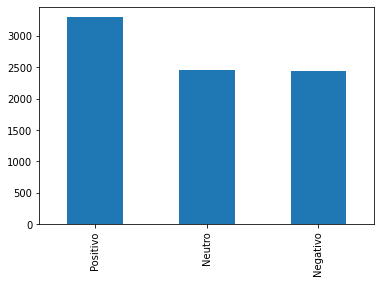

In [ ]:
classificados.Classificacao.value_counts().plot(kind='bar') #Gerando um grafico de barras com os dados classificados com cada sentimento

In [ ]:
#Observando o tamanho do Data Frame
classificados.Text.count()

8199

In [ ]:
#Remover os dados repetidos como os ReTweets
classificados.drop_duplicates(['Text'], inplace=True) #

In [ ]:
#Observando o tamanho do Data Frame
classificados.Text.count()

5765

In [ ]:
# Separando texto e suas classes:
texto = classificados['Text']
classes = classificados['Classificacao']

# **Stopwords**

 . São palavras e termos frequentes porém que não possuem relevância nas sentenças

. Exemplos: as, os, um, com, de, da, para, etc...

. O nltk possui uma lista de stopwords em 16 idiomas diferentes. Vamos criar função que remova todas as stopwords em POrtuguês.

# **Remove caracteres indesejados como links...**


Essa etapa é para retirar dados indesejados que não trazem nenhuma informação\

In [ ]:
def Preprocessing(instancia):
     instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
     stopwords = set(nltk.corpus.stopwords.words('portuguese'))
     palavras = [i for i in instancia.split() if not i in stopwords]
     return (" ".join(palavras))

In [ ]:
# Aplica a função em todos os dados:
from nltk.corpus import stopwords
texto = [Preprocessing(i) for i in texto]

In [ ]:
texto[:10]

['���⛪ @ catedral santo antônio governador valadares/mg',
 '� @ governador valadares, minas gerais',
 '�� @ governador valadares, minas gerais',
 '���',
 '��� psol vai questionar aumento vereadores prefeito bh justiça politica estado minas',
 'bom bandido morto deputado cabo júlio condenado fica inelegível 10 anos politica estado minas',
 '25% mineiros dizem torcer time nenhum,mesmo dentro estado atléticomg cruzeiro pq?',
 'gigantesca barba mal destaque caderno cultura estado minas',
 'bb governo minas travam disputa sobre depósitos judiciais',
 'vcs bh fica pequena! belo horizonte (pron [bɛloɾiˈzõntʃi][10] capital estado mg, área aproximadamente 331 km²']

# **Tokenização**

É o processo de tokenizar é pegar as strings e dividir em uma lista de tokens.

Exemplo : Aprendendo Data Science para valer

Fica : [ 'Aprendendo' , 'Data', 'Science' , 'para', 'valer']

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 

In [ ]:
# Instancia o objeto que faz a vetorização dos dados de texto:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

In [ ]:
# Aplica o vetorizador nos dados de texto e retorna uma matriz esparsa ( contendo vários zeros):
freq_tweets = vectorizer.fit_transform(texto)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
# Visualizando o número de linhas e colunas da matriz:
freq_tweets.shape

(5765, 7336)

In [ ]:
# Treino de modelo de Machine Learning:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
# Defina instâncias de teste dentro de uma lista:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [ ]:
# Transforma os dados de teste em vetores de palavras:
freq_testes = vectorizer.transform(testes)

In [ ]:
# Fazendo a classificação com o modelo treinado:
for t, c in zip (testes,modelo.predict(freq_testes)):
    # t representa o tweet e c a classificação de cada tweet.
    print (t +", "+ c) 

Esse governo está no início, vamos ver o que vai dar, Negativo
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [ ]:
# Probabilidades de cada classe:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.68, 0.32, 0.  ],
       [0.12, 0.84, 0.04],
       [0.99, 0.01, 0.  ],
       [0.36, 0.64, 0.  ],
       [0.1 , 0.9 , 0.  ]])

In [ ]:
# Função para aplicar as tags de negação:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

In [ ]:
# Vetorizando os dados e passando o classificador:
from sklearn.pipeline import Pipeline
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
pipeline_simples.fit(texto,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [ ]:
# Pipeline que atribui tag de negações nas palavras:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])
pipeline_negacoes.fit(texto,classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x7f54bacb4440>)),
                ('classifier', MultinomialNB())])

In [ ]:
# Pipeline simples:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
# Pipeline com tag de negação:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
# Fazendo o cross validation do modelo:
resultados = cross_val_predict(pipeline_simples, texto, classes, cv=10)

In [ ]:
# Medindo a acurácia média do modelo:
metrics.accuracy_score(classes,resultados)

0.8742411101474414

In [ ]:
# Matriz de confusão:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       852      94         5   951
Neutro         205    1675        94  1974
Positivo        55     272      2513  2840
All           1112    2041      2612  5765


In [ ]:
from sklearn import metrics

# Medidas de validação do modelo:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.77      0.90      0.83       951
      Neutro       0.82      0.85      0.83      1974
    Positivo       0.96      0.88      0.92      2840

    accuracy                           0.87      5765
   macro avg       0.85      0.88      0.86      5765
weighted avg       0.88      0.87      0.88      5765



In [ ]:
# Função para automatizar todo o processo acima:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [ ]:
# Naive Bayes simples:
Metricas(pipeline_simples,texto,classes)

'Acurácia do modelo: 0.8742411101474414'

In [ ]:
# Naive Bayes com tag de negacoes:
Metricas(pipeline_negacoes,texto,classes)

'Acurácia do modelo: 0.6905464006938421'

In [ ]:
# SVM linear simples:
Metricas(pipeline_svm_simples,texto,classes)

'Acurácia do modelo: 0.8863833477883781'

In [ ]:
# SVM linear com tag de negacoes:
Metricas(pipeline_svm_negacoes,texto,classes)

'Acurácia do modelo: 0.7457068516912403'

In [ ]:
# Cross validation:
resultados = cross_val_predict(pipeline_negacoes, texto, classes, cv=10)

In [ ]:
# Medindo a acurácia do modelo:
metrics.accuracy_score(classes,resultados)

0.6905464006938421

In [ ]:
# Medidas de validação do modelo:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.68      0.52      0.59       951
      Neutro       0.66      0.58      0.61      1974
    Positivo       0.71      0.83      0.76      2840

    accuracy                           0.69      5765
   macro avg       0.68      0.64      0.66      5765
weighted avg       0.69      0.69      0.68      5765



In [ ]:
# Matriz de confusão:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       492     177       282   951
Neutro         151    1136       687  1974
Positivo        79     408      2353  2840
All            722    1721      3322  5765


# **Consumindo tweets reais para analisar com o algoritmo já treinado**

In [ ]:
#Instalação da biblioteca
!pip install TwitterSearch

In [ ]:
#Importação das bibliotecas
from datetime import datetime
import json

In [ ]:
#Definindo as chaves fornecidas pelo twitter para consumo da API
consumer_key = 'IMJh4kjQLGDzUaT9t1v0RXm5Y'
consumer_secret = 'cjt9d684CpvElXof1BxUMgSakNnFBVLDweQTSpGZolzzrnU8JE'

In [ ]:
#Definindo os tokens fornecidos pelo twitter para consumo da API
access_token = '968521944944529408-oI5NcJVaZellwrsPjhsQkQPDeAZJzKf'
access_token_secret = 'hc7bTI65fG97smD3ZEB6iCjLrBzHBxn2Sp6TIaX8fZSJZ'

In [ ]:
from TwitterSearch import *                                                                                          #Importando a biblioteca para consumo da API do Twitter
try:

    ts = TwitterSearch(                                                                                              #Objeto TwitterSearch object
        consumer_key = consumer_key,
        consumer_secret = consumer_secret,
        access_token = access_token,
        access_token_secret = access_token_secret
     )

    tso = TwitterSearchOrder()                                                                                        #Criando o objeto TwitterSearchOrder
    tso.set_keywords(['lula'], or_operator = True)                                                                    #Definindo as palavras chaves para a pesquisa
    tso.set_language('pt')                                                                                            #Definindo a língua a ser pesquisada

    for tweet in ts.search_tweets_iterable(tso):                                                                      # ts.search_tweets_iterable(tso) é um metadata
        print( 'created_at: ', tweet['created_at'], 'User_id: ', tweet['id_str'], 'Tweet: ', tweet['text']  )         #Definindo quais atributos serão mostrados
        created_at = tweet['created_at']
        user_id = tweet['id_str']
        texto = tweet['text']

        with open("tweet.json", "a+") as output:                                                                      #Criando arquivo JSON para recebimento dos dados

          data = {
              "created_at": created_at,
              "User_id": user_id,
              "tweet": texto
          }
          output.write("{}\n".format(json.dumps(data)))                                                                #Preenchendo os dados no arquivo JSON

except TwitterSearchException as e:
    print(e)

A saída de streaming foi truncada nas últimas 5000 linhas.
created_at:  Sun Nov 28 00:58:02 +0000 2021 User_id:  1464760461371531269 Tweet:  RT @ThiagoResiste: Sara Giromini (Winter) disse que nos governos Lula e Dilma podia gritar e fazer oposição livremente, e agora é ameaçada…
created_at:  Sun Nov 28 00:58:01 +0000 2021 User_id:  1464760456464277517 Tweet:  RT @DilmaResiste: Quando eu vi o Antagonista publicar a matéria com o título "Sem Lula e Sem Bolsonaro, Moro vence" eu pensei:
~ se tirar o…
created_at:  Sun Nov 28 00:58:00 +0000 2021 User_id:  1464760451334606849 Tweet:  RT @TonyStarkMeta: Os mesmos que reclamam do Flávio por comprar uma casa de 6 milhões em 30 anos não falam nada do Lula ter 27 milhões na c…
created_at:  Sun Nov 28 00:57:58 +0000 2021 User_id:  1464760444246188032 Tweet:  RT @RaquelStasiaki: A Segunda turma do Supremo derruba o bloqueio de bens de Lula. Vale a pena ROUBAR os brasileiros? Para Ricardo Lewandow…
created_at:  Sun Nov 28 00:57:56 +0000 2021 User_i

In [ ]:
import pandas as pd                                                             #Importando biblioteca
df = pd.read_json('tweet.json', lines = True)                                   #Definindo variavel para receber o arquivo JSON
df.head(10)                                                                     #Abrindo as 10 primeiras linhas do arquivo JSON

,created_at,User_id,tweet
0,2021-11-28 11:34:38+00:00,1464920666130554880,RT @FrankCastle2009: VC CONHECE UM POBRE QUE S...
1,2021-11-28 11:34:37+00:00,1464920663643373568,RT @TCelTitoCanto: Deixa eu ver se entendi. O ...
2,2021-11-28 11:34:36+00:00,1464920657200828416,RT @AttuchLeonardo: O capital e as eleições em...
3,2021-11-28 11:34:34+00:00,1464920651454631936,"RT @gustavocastanon: Agora temos Bozo, Lula, M..."
4,2021-11-28 11:34:34+00:00,1464920649118408704,"RT @oiIuiz: Sim, mas os caras não te deixam gr..."
5,2021-11-28 11:34:32+00:00,1464920641644240896,@Rodrigues3568 @camargo_jobson Vcs sempre usam...
6,2021-11-28 11:34:29+00:00,1464920630457999360,@folha Kkkkkkkkk olha o Lula ai https://t.co/m...
7,2021-11-28 11:34:29+00:00,1464920627287109632,"RT @renatosimoespt: ""Em encontro com evangélic..."
8,2021-11-28 11:34:28+00:00,1464920624107864064,RT @ptbrasil: 🤳🏾A presença do ex-presidente Lu...
9,2021-11-28 11:34:28+00:00,1464920623898107904,RT @anacronices: lula: abertura do fórum socia...


In [ ]:
lula = df['tweet']

In [ ]:
lula

0        RT @FrankCastle2009: VC CONHECE UM POBRE QUE S...
1        RT @TCelTitoCanto: Deixa eu ver se entendi. O ...
2        RT @AttuchLeonardo: O capital e as eleições em...
3        RT @gustavocastanon: Agora temos Bozo, Lula, M...
4        RT @oiIuiz: Sim, mas os caras não te deixam gr...
                               ...                        
23891    RT @ThiagoResiste: Agora que Lula ganhou tudo ...
23892    @diogomainardi @Miltonneves Resposta fácil 25%...
23893    RT @Alexand92840726: A exatos 316 dias para ir...
23894    @FrankCastle2009 Sim, a Marisa Letícia, ainda ...
23895    @palmeriodoria ALÔ BRASIL.\nAGORA É LULA! http...
Name: tweet, Length: 23896, dtype: object

In [ ]:
lula = [Preprocessing(i) for i in lula]

In [ ]:
lula[ :30]

['rt @frankcastle2009 vc conhece pobre saiu pobreza ajuda lula, pt esquerda????',
 'rt @tceltitocanto deixa ver entendi stf desbloqueou lula bens lula?🤔🤔🤔',
 'rt @attuchleonardo capital eleições 2022 (1 bolsonaro mantém parcela radical agronegócio (2 moro fica fatia…',
 'rt @gustavocastanon agora bozo, lula, moro doria acotovelando executar projeto lutando debate econômico s…',
 'rt @oiiuiz sim, caras deixam gritar hoje escolhidos lula dilma',
 '@rodrigues3568 @camargo_jobson vcs sempre usam narrativa vai site kkk ué candidato vcs deveria…',
 '@folha kkkkkkkkk olha lula ai',
 'rt @renatosimoespt encontro evangélic@s, lula disse extraordinária relação todas igrejas governou distinção…',
 'rt @ptbrasil 🤳🏾a presença expresidente lula redes sociais cresceu últimos meses, acordo pesquisa consultoria digital…',
 'rt @anacronices lula abertura fórum social mundial sergio moro mesa redonda mbl',
 'rt @lulaoficial encontro lula evangélicos',
 '@stf_oficial tudo ladrão !! @gilmarmendes covarde f

In [ ]:
lula_tweets = vectorizer.fit_transform(lula)
type(lula_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
lula_tweets.shape

(23896, 14489)